In [1]:
# Importing necessary modules
import datetime as dt
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

**Getting Data**

Got the data from preprocessing notebook

In [2]:
abnb_6 = pd.read_csv('abnb_6_ForModeling.csv')

In [3]:
abnb_6.columns

Index(['Unnamed: 0', 'Listing #', 'host_is_superhost', 'accommodates',
       'bedrooms', 'bathrooms_number', 'beds', 'num_amenities',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Shared room', 'income', 'price', 'log_price'],
      dtype='object')

**Separating Features and Target labels**

In [4]:
abnb_6 = abnb_6.drop('Unnamed: 0', axis=1)

In [5]:
X = abnb_6.drop(columns = ['log_price', 'price', 'Listing #', 'income', 'review_scores_rating'], axis=1)
y = abnb_6['log_price']

**Splitting X, y into train and test samples**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [7]:
X_train.head()

,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room
1367,0,2,1.0,1.0,1.0,17,1,0,0,1,0,0,1,0,0
30755,0,3,2.0,2.0,1.0,15,0,1,0,0,1,0,1,0,0
31894,0,3,1.0,1.0,1.0,27,0,1,0,0,1,0,1,0,0
27540,0,3,1.0,1.0,1.0,34,1,1,1,0,0,0,1,0,0
12073,0,2,1.0,1.0,1.0,20,19,0,0,1,0,0,0,0,0


In [8]:
y_train.head()

1367     4.787492
30755    5.416100
31894    5.347108
27540    4.820282
12073    4.234107
Name: log_price, dtype: float64

**Standardizing numeric features**

numeric features are in the index range 1 through 7

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 1:7] = scaler.fit_transform(X_train.iloc[:, 1:7])
X_test.iloc[:, 1:7] = scaler.transform(X_test.iloc[:, 1:7])

C:\Users\tnsub\ANACONDA\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\tnsub\ANACONDA\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [10]:
X_train.head()

,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room
1367,0,-0.425540,-0.232745,-0.348645,-0.474956,-0.400880,-0.453036,0,0,1,0,0,1,0,0
30755,0,0.132878,1.090220,1.928109,-0.474956,-0.608801,-0.473865,1,0,0,1,0,1,0,0
31894,0,0.132878,-0.232745,-0.348645,-0.474956,0.638727,-0.473865,1,0,0,1,0,1,0,0
27540,0,0.132878,-0.232745,-0.348645,-0.474956,1.366452,-0.453036,1,1,0,0,0,1,0,0
12073,0,-0.425540,-0.232745,-0.348645,-0.474956,-0.088998,-0.078115,0,0,1,0,0,0,0,0


In [11]:
X_test.head()

,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room
11191,1,-0.425540,-0.232745,-0.348645,-0.474956,0.014963,1.213281,1,0,0,0,1,0,0,0
12643,1,0.691296,1.090220,-0.348645,1.371645,0.950609,1.588203,0,0,0,1,0,1,0,0
12877,0,-0.425540,-1.555711,-0.348645,-0.474956,0.430806,0.442610,0,0,0,1,0,1,0,0
13245,0,-0.425540,-0.232745,1.928109,-0.474956,-1.024644,-0.473865,1,0,1,0,0,0,0,0
30493,0,-0.983958,-0.232745,-0.348645,-0.474956,-0.192959,-0.473865,0,0,0,1,0,1,0,0


# **Modeling**

Trying three different models of incremental complexity.
Each model will be evaluated based on performance metric mean_absolute_error(mae). Accordingly a model with lowest mae could be selected.

 <font color='blue'>1. DUMMY REGRESSOR (using median)</font>

In [12]:
# Initially can use a dummyregressor
dumb_reg = np.median(y_train)

mae_dummy_model = mean_absolute_error(np.exp(y_train), np.exp(np.repeat(dumb_reg, len(y_train))))
print("Dummy Model Mae: ", mae_dummy_model)


Dummy Model Mae:  67.60935159817352


In [13]:
# dummy regressor on test data
mae_dummy_model_test = mean_absolute_error(np.exp(y_test), np.exp(np.repeat(dumb_reg, len(y_test))))
print("Dummy Model Mae_test: ", mae_dummy_model_test)

Dummy Model Mae_test:  67.61001534078457


<font color='blue'>2. LINEAR REGRESSION</font>

In [14]:
lr = LinearRegression().fit(X_train, y_train)
y_tr_pred = lr.predict(X_train)

mae_lr = mean_absolute_error(np.exp(y_train), np.exp(y_tr_pred))
print("Linear Regression: ", mae_lr)

Linear Regression:  48.27541299352196


In [15]:
# Linear regression for test data
y_te_pred = lr.predict(X_test)
mae_lr = mean_absolute_error(np.exp(y_test), np.exp(y_te_pred))
print("Linear Regression: ", mae_lr)

Linear Regression:  49.241189873635584


with linear regression, the mae has improved from $67 to $48. To have a look at how each feature does in the model, I used OLS from statsmodels so that the magnitude of coefficients and their significance could be examined. Results revealed that "neighbourhood_group_Bronx", "neighborhood_group_Queens" and "host_is_superhost" p values were higher than 0.05 and therefore not significant. All other features were significant.

In [16]:
import statsmodels.api as sm
from scipy import stats

X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     2021.
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:18:08   Log-Likelihood:                -18124.
No. Observations:               27375   AIC:                         3.628e+04
Df Residuals:                   27359   BIC:                         3.641e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<font color='green'>2.1 Use of Lasso regression with Gridsearh CV</font>

In order to avoid overfitting and to reduce the size of mae further, Lasso regression was used. 
list of alphas used (0.001, 0.01, 0.1, 1, 10)

In [17]:


from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10]

param_grid = dict(alpha = alpha)

lasso = Lasso()
grid = GridSearchCV(lasso, param_grid, verbose=1, n_jobs=-1, cv = 5)
grid_result = grid.fit(X_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.7s finished


0.5246048239656489
{'alpha': 0.0001}


In [18]:
# Using alpha=0.001, which was obtained from Gridsearch, now we can fit the Lasso model.
lasso = Lasso(alpha=0.0001)
lasso_result = lasso.fit(X_train, y_train)
y_train_pred = lasso_result.predict(X_train)
y_test_pred = lasso_result.predict(X_test)
mae_train = mean_absolute_error(np.exp(y_train), np.exp(y_train_pred))
mae_test = mean_absolute_error(np.exp(y_test), np.exp(y_test_pred))
print(lasso_result.coef_)
print(mae_train)
print(mae_test)

[ 0.01337544  0.17609899  0.07998993  0.02040374 -0.01404164  0.03124841
 -0.02391926  0.03979327 -0.001027    0.13628889  0.41879374  0.00087348
  0.56980168  0.7966624  -0.20539929]
48.27717934782139
49.25241493951839


mae remains the same even after Lasso regression, so it didn't do any betterment for the model. Also the alpha being very small indicates that it doesn't make any difference from the linear regression model. So next, we could try an ensemble method, for instance, Random Forest Model.
Along with Random Forest Model, Randomized search CV was used to find the optimum values for hyperparameters (number of estimators, maximum features to be used, and maximum depth) for the random forest model.

<font color='blue'>3.Random Forest Regression Along with RandomizedSearchCV</font>

For Decision tree based models lile Random Forest or Gradient Boosting, feature standardization is not needed as the magnitude do not affect the outcome

In [19]:
# Creating the hyperparamters for the random grid to be used in the model

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 20 )]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 10, num = 2)]
#max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [20]:
# Fitting Random Forest model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_rs = RandomizedSearchCV(rf, random_grid, cv=5, n_iter = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   51.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [50, 73, 97, 121, 144,
                                                         168, 192, 215, 239,
                                                         263, 286, 310, 334,
                                                         357, 381, 405, 428,
                                                         452, 476, 500]},
                   random_state=42, verbose=2)

In [21]:
#Selecting best parameters
rf_rs.best_params_

{'n_estimators': 286, 'max_features': 'sqrt', 'max_depth': 10}

In [22]:
rf_rs.best_score_

0.5734880140145432

In [23]:
y_train_pred = rf_rs.predict(X_train)

In [24]:
print('Random Forest Model train data mae: {0:.2f}'.format(mean_absolute_error(np.exp(y_train), np.exp(y_train_pred))))

Random Forest Model train data mae: 43.40


In [25]:
y_test_pred_rf = rf_rs.predict(X_test)
print('Random Forest Model test data mae: {0:.2f}'.format(mean_absolute_error(np.exp(y_test), np.exp(y_test_pred_rf)))) 

Random Forest Model test data mae: 45.95


In [ ]:
After the random forest model with randomized search, it seems the mae has even reduced from $48 to $43. Another ensemble approach is to try 
Gradient boosting regressor. We can check if a gradient boosting model makes any further improvement on the mae.

<font color='blue'>3.Gradient Boosting Model</font>

In [11]:
X = abnb_6.drop(columns = ['log_price', 'price', 'Listing #', 'income'], axis=1)
y = abnb_6['log_price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

Feature review_scores_rating had missing values, however to include that in model, missing values were imputed with -10000.

In [13]:
X_test['review_scores_rating'] = X_test['review_scores_rating'].fillna(-10000)
X_train['review_scores_rating'] = X_train['review_scores_rating'].fillna(-10000)

<ipython-input-13-329f99811b3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['review_scores_rating'] = X_test['review_scores_rating'].fillna(-10000)
<ipython-input-13-329f99811b3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['review_scores_rating'] = X_train['review_scores_rating'].fillna(-10000)


For decison tree models like Random Forest and Gradient Boosting, standardization is not needed, as the outcome doesn't depend on the magnitude of features.

In [26]:
#Gradient Boosting model will be tried with GridsearchCV

from sklearn.ensemble import GradientBoostingRegressor
params = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [ 3, 5, 7, 9, 11]}
gb = GradientBoostingRegressor()
cv = GridSearchCV(gb, params, cv = 5, n_jobs = -1)
cv_fit = cv.fit(X_train, y_train)

In [27]:
print(cv_fit.best_params_)

{'max_depth': 7, 'n_estimators': 50}


In [17]:
# Prediction and calculating maes
y_pred = cv_fit.predict(X_train)
print('gradient boost mae for train data: {0:.3f}'.format(mean_absolute_error(np.exp(y_train), np.exp(y_pred))))  
y_test_pred = cv_fit.predict(X_test)
print('gradient boost mae for test data: {0:.3f}'.format(mean_absolute_error(np.exp(y_test), np.exp(y_test_pred)))) 

gradient boost mae for train data: 41.170
gradient boost mae for test data: 45.200


Now the mae has further reduced from 43 to 41 with gradient boosting model. So the rest of the analysis will focus only on gradient boosting models.

Below diagram shows actual prices against predicted prices. The more closer the blue dots are to the black diagonal-dotted line, the better will be the predictions. This diagram also shows that for prices less than $400, the predictions are somewhat better than for prices higher than $400. That is for price range > 400, most of the predictions are lower than the actual values. 

One way to minimise this issue is to predict prices separately for different price ranges, for instance, different price model for less than $400, another one for $400 - $600 and another model for greater than $600.



Text(0, 0.5, 'Predicted Prices')

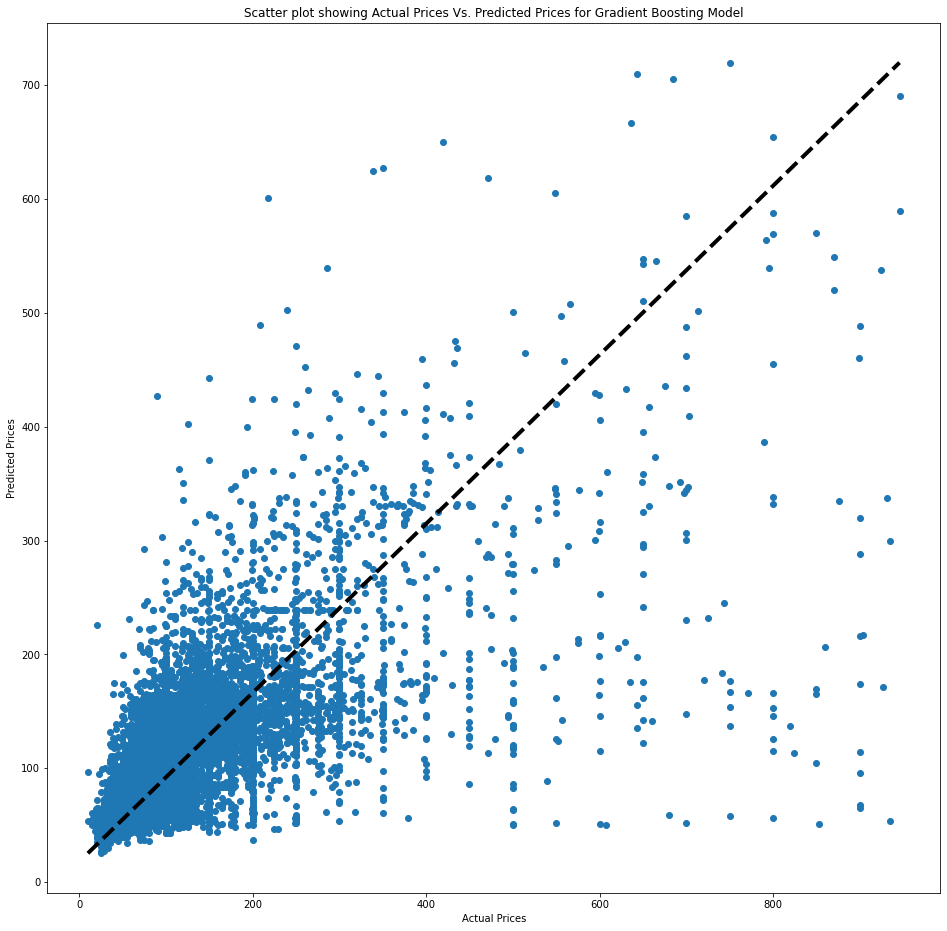

In [23]:
fig,ax = plt.subplots(figsize=(16,16))
ax.scatter(np.exp(y_test), np.exp(y_test_pred))
ax.plot([np.exp(y_test.min()), np.exp(y_test.max())], [np.exp(y_test_pred.min()), np.exp(y_test_pred.max())], 'k--', lw=4)
ax.set_title('Scatter plot showing Actual Prices Vs. Predicted Prices for Gradient Boosting Model')
ax.set_xlabel('Actual Prices')
ax.set_ylabel('Predicted Prices')


**Different Models For Different Price Ranges**

Following cells will focus on segmenting listings based on levels of prices for better prediction
3 categories of prices will be chosen based on 

1.upto 75th percentile
2. between 75th and 99th percentile 
3. prices above 99th percentile.

price at 75th percentile = 156, 
price at 99th percentile = 600

In [62]:

print('Price at 75th percentile: ' + str(abnb_6['price'].quantile(0.75)))
print('sample number under $156: ' + str(abnb_6['price'].loc[abnb_6['price']<156].count()))

Price at 75th percentile: 156.0
sample number under $156: 27350


In [63]:
print('Price at 99th percentile: ' + str(abnb_6['price'].quantile(0.95)))
print('sample number under $600: ' + str(abnb_6['price'].loc[abnb_6['price']<325].count()))
print('sample number between $156 and $600: ' + str(36091 - 27350))

Price at 99th percentile: 325.0
sample number under $600: 34642
sample number between $156 and $600: 8741


In [64]:
print(abnb_6['price'].quantile(0.99))
print(abnb_6['price'].loc[abnb_6['price']>600].count())

600.0
363



**1. For prices < $156**

In [25]:
# For prices <$156
# subsetting data
abnb_6_l156 = abnb_6.loc[abnb_6['price'] < 156]

In [26]:
#Splitting into X and y
X_l156 = abnb_6_l156.drop(columns = ['log_price', 'price', 'Listing #', 'income'], axis=1)
y_l156 = abnb_6_l156['log_price']

In [27]:
X_l156['review_scores_rating'] = X_l156['review_scores_rating'].fillna(-10000)

In [28]:
#Splitting into train and test
X_tr_l156, X_te_l156, y_tr_l156, y_te_l156 = train_test_split(X_l156, y_l156, test_size=0.25, random_state=96)

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_params = {'n_estimators': [25,50,100],
         'max_depth': [3,5,7]}
gb = GradientBoostingRegressor()
cv = GridSearchCV(gb, gbr_params, cv = 10, n_jobs = -1)
cv_fit_l156 = cv.fit(X_tr_l156, y_tr_l156)

In [30]:
cv.best_params_


{'max_depth': 5, 'n_estimators': 100}

In [31]:

y_pred_l156 = cv_fit_l156.predict(X_tr_l156)
print('gradient boost mae: {0:.2f}'.format(mean_absolute_error(np.exp(y_tr_l156), np.exp(y_pred_l156))))  

gradient boost mae: 19.64


In [32]:
# predicting for test data
y_te_l156_pred = cv_fit_l156.predict(X_te_l156)
print('gradient boost mae: {0:.2f}'.format(mean_absolute_error(np.exp(y_te_l156), np.exp(y_te_l156_pred)))) 

gradient boost mae: 20.49


In [39]:
# making a scatterplot to compare actual and predicted prices
# Writing a function to make plot
def scatterplot_predict_actual(actual, predict):
    fig,ax = plt.subplots(figsize=(16,16))
    ax.scatter(np.exp(actual), np.exp(predict))
    ax.plot([(np.exp(actual)).min(), (np.exp(actual)).max()], [(np.exp(actual)).min(), (np.exp(actual)).max()], 'k--', lw=4)
    ax.set_title('Scatterplot showing Actual Prices Vs. Predicted Prices - (prices <$156)')
    ax.set_xlabel('Actual Prices')
    ax.set_ylabel('Predicted Prices')

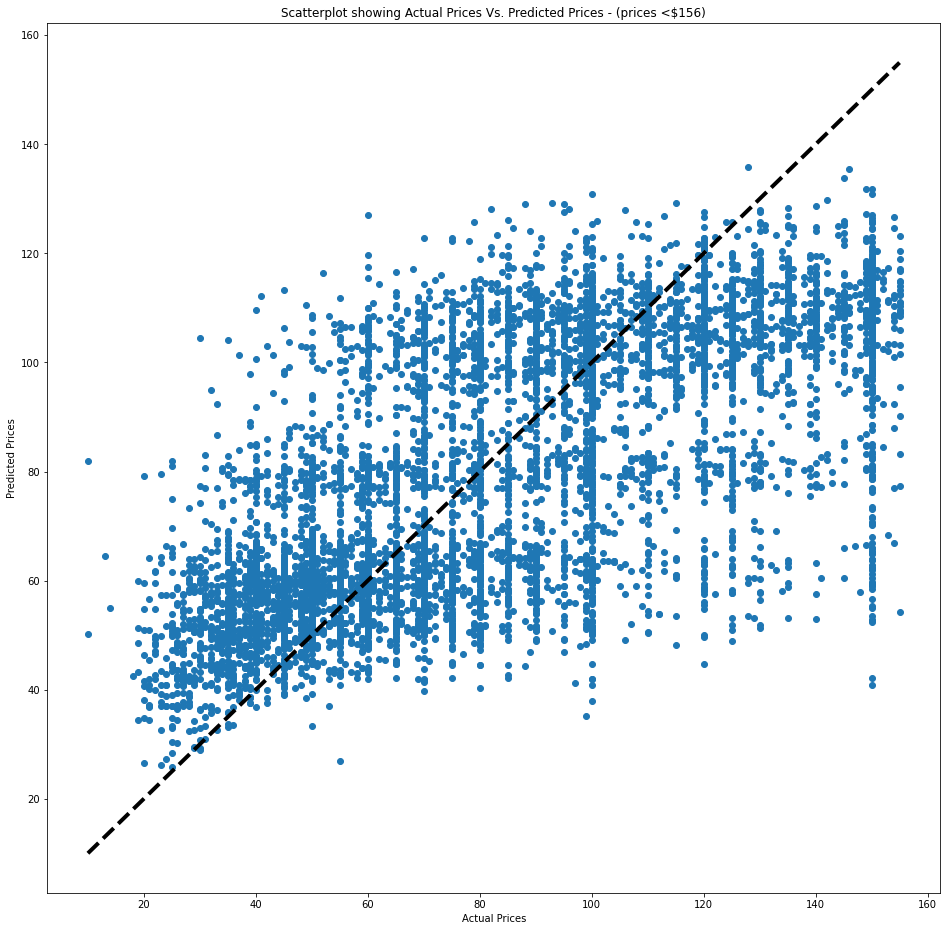

In [40]:
scatterplot_predict_actual(y_te_l156, y_te_l156_pred)

A function to create a barchart was created to show the feature importances in predicting prices (sorted in descending order).

In [75]:
def feature_importances_barchart(variables, imps, make_plot = True):
    """Plot a barchart of feature importances
    
    Arguments
        variables: list
        imps: list
    """
    feat_imps = pd.DataFrame({'feature': variables,
              'importance_score': imps})
    
    feat_imps = feat_imps.sort_values(by = 'importance_score', ascending = True)
    
    if make_plot:
        feat_imps.set_index('feature').plot(kind = 'barh', figsize = (16, 8))
    
    return feat_imps

In [76]:
cv.best_estimator_.feature_importances_

array([0.00214409, 0.07497874, 0.01689164, 0.0251932 , 0.00916276,
       0.03327874, 0.021513  , 0.02030391, 0.01344898, 0.00249035,
       0.01286395, 0.09848027, 0.00734629, 0.64398043, 0.00306237,
       0.01486127])

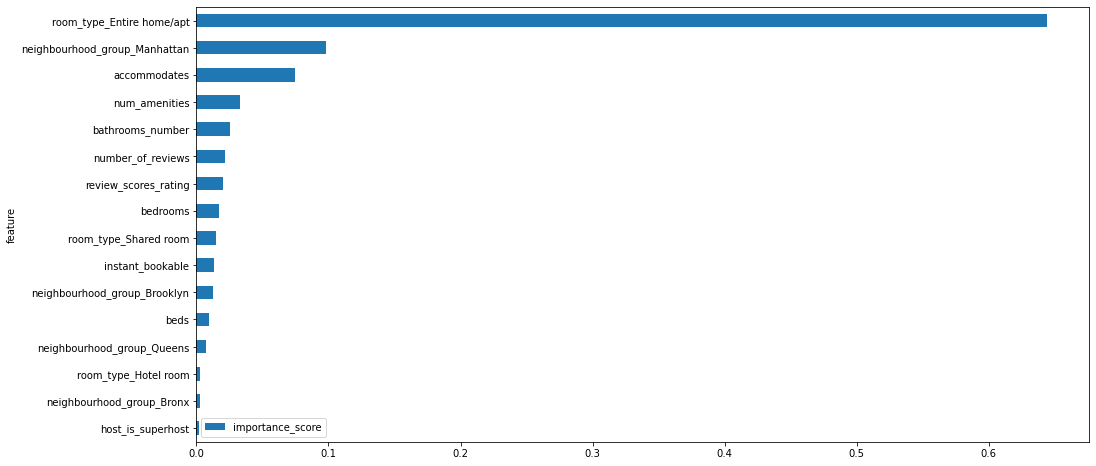

In [77]:
feat_imps = feature_importances_barchart(X_te_l156.columns, cv.best_estimator_.feature_importances_)

For listings less than $156, listing being entire home has a high impact on prices. Other features neighborhood being Manhatton and number of accomodates also influence price.

**Feature Importance using Shapley Additives**

In [445]:
pip install shap

Note: you may need to restart the kernel to use updated packages.Collecting shap



In [49]:
import shap

In [50]:
shap.initjs()

In [51]:
explainer = shap.Explainer(cv.best_estimator_)
shap_values = explainer(X_te_l156)

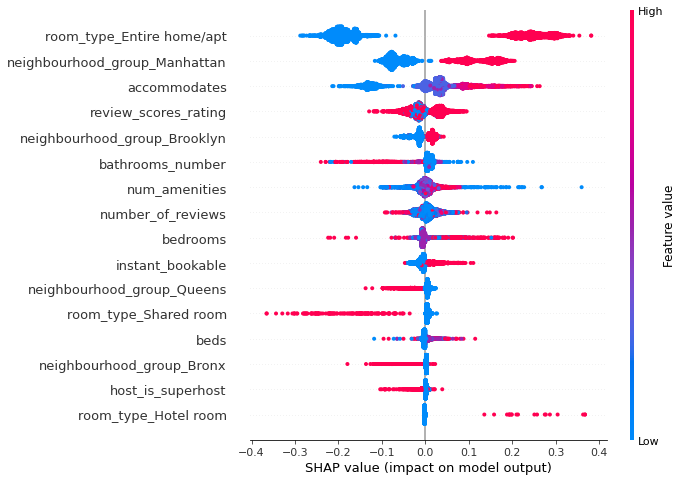

In [52]:
shap.summary_plot(shap_values, features=X_te_l156, feature_names=X_te_l156.columns)

**Error Analysis (for prices under $156)**

In [42]:
# making predicted values into a pandas series
y_te_l156_pred = pd.Series(np.exp(y_te_l156_pred), index=y_te_l156.index)

In [43]:
# combining predicted and actual values into a dataframe
df_l156 = pd.DataFrame(data=[np.exp(y_te_l156), y_te_l156_pred]).T
df_l156.columns = ['y_te_l156', 'y_te_l156_pred']
df_l156.head()

,y_te_l156,y_te_l156_pred
26155,45.0,98.441198
34009,45.0,92.938760
34651,33.0,49.039158
2935,125.0,98.824995
19364,104.0,106.876932


In [44]:
#combining the predicted, actual values with the features columns (X_test)
X_te_l156_y_te_l156 = pd.concat([df_l156, X_te_l156], axis=1)

In [45]:
# calculating mae
X_te_l156_y_te_l156['error'] = X_te_l156_y_te_l156['y_te_l156'] - X_te_l156_y_te_l156['y_te_l156_pred']

In [47]:
# Finding number of predictions that has mae less than $50
X_te_l156_y_te_l156.loc[np.abs(X_te_l156_y_te_l156['error']) < 20]

,y_te_l156,y_te_l156_pred,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,review_scores_rating,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,error
34651,33.0,49.039158,0,1,1.0,1.0,1.0,31,1,100.0,0,1,0,0,0,0,0,0,-16.039158
19364,104.0,106.876932,0,4,2.0,1.0,3.0,33,31,82.0,1,0,1,0,0,1,0,0,-2.876932
1912,61.0,55.003250,1,2,1.0,1.0,2.0,8,158,98.0,1,0,0,1,0,0,0,1,5.996750
22581,99.0,82.681496,0,3,0.0,1.0,2.0,9,22,89.0,0,0,0,1,0,0,0,0,16.318504
4031,78.0,95.694262,0,4,1.0,1.0,1.0,25,66,91.0,0,0,1,0,0,1,0,0,-17.694262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27345,149.0,131.852079,1,5,2.0,2.0,2.0,32,9,100.0,1,0,1,0,0,1,0,0,17.147921
4624,60.0,57.402647,0,2,1.0,1.0,1.0,6,0,-10000.0,0,0,1,0,0,0,0,0,2.597353
28537,68.0,77.038894,0,3,2.0,1.0,0.0,38,19,96.0,0,0,0,0,1,0,0,0,-9.038894
6649,99.0,82.391454,1,3,2.0,2.0,2.0,31,94,100.0,0,0,0,0,0,0,0,0,16.608546


In [41]:
print('Out of ' + str(round(27350/4)) + ' predictions, ' + str(round(3959/6837 *100)) + ' % has absolute error less than $20.')

Out of 6838 predictions, 58 % has absolute error less than $20.


In [88]:
print('Out of ' + str(round(27350/4)) + ' predictions, ' + str(round(6496/6837 *100)) + ' % has mean absolute error less than $50.')

Out of 6838 predictions, 95 % has mean absolute error less than $50.


In [55]:
# Finding what type of features may have led for a high mae in prediction
X_te_l156_y_te_l156.loc[np.abs(X_te_l156_y_te_l156['error']) < 10]

,y_te_l156,y_te_l156_pred,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,review_scores_rating,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,error
19364,104.0,106.876932,0,4,2.0,1.0,3.0,33,31,82.0,1,0,1,0,0,1,0,0,-2.876932
1912,61.0,55.003250,1,2,1.0,1.0,2.0,8,158,98.0,1,0,0,1,0,0,0,1,5.996750
36242,56.0,62.891351,0,1,1.0,1.0,1.0,24,0,-10000.0,1,0,0,1,0,0,0,0,-6.891351
28330,49.0,51.319709,1,1,1.0,1.0,0.0,13,3,100.0,1,0,0,1,0,0,0,1,-2.319709
35622,107.0,107.861225,0,4,0.0,1.0,2.0,14,0,-10000.0,1,0,0,1,0,1,0,0,-0.861225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30514,50.0,48.081341,0,1,1.0,1.0,0.0,15,0,-10000.0,0,0,0,0,1,0,0,1,1.918659
31647,59.0,59.810294,0,1,1.0,1.0,1.0,19,0,-10000.0,0,0,0,1,0,0,0,0,-0.810294
4624,60.0,57.402647,0,2,1.0,1.0,1.0,6,0,-10000.0,0,0,1,0,0,0,0,0,2.597353
28537,68.0,77.038894,0,3,2.0,1.0,0.0,38,19,96.0,0,0,0,0,1,0,0,0,-9.038894


In [56]:
#Getting the test_data index from original index (e.g. for 4885)
X_te_l156_y_te_l156.index.get_loc(31647)

6824

In [57]:
i = 6824
shap.force_plot(explainer.expected_value, shap_values.values[i], features=X_te_l156.iloc[i], feature_names=X_te_l156.columns)


Shap force plot above shows that for listing with index 4885, not being an entire home and not being from manhatton and less number of amenities pulled it's predicted price lower.

**Predicting Prices between $156 and $600**

In [59]:
# For prices between $156 and $600
# subsetting data
abnb_6_156to600 = abnb_6.loc[(abnb_6['price'] >= 156) & (abnb_6['price'] <= 600)]

In [60]:
#Splitting into X and y
X_156to600 = abnb_6_156to600.drop(columns = ['log_price', 'price', 'Listing #', 'income'], axis=1)
y_156to600 = abnb_6_156to600['log_price']

In [61]:
X_156to600['review_scores_rating'] = X_156to600['review_scores_rating'].fillna(-10000)

In [62]:
#Splitting into train and test
X_tr_156to600, X_te_156to600, y_tr_156to600, y_te_156to600 = train_test_split(X_156to600, y_156to600, test_size=0.25, random_state=19)

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_params = {'n_estimators': [25,50,100],
         'max_depth': [3,5,7]}
gb = GradientBoostingRegressor()
cv = GridSearchCV(gb, gbr_params, cv = 10, n_jobs = -1)
cv_fit_156to600 = cv.fit(X_tr_156to600, y_tr_156to600)


In [64]:
cv.best_params_

{'max_depth': 5, 'n_estimators': 50}

In [65]:
y_pred_156to600 = cv_fit_156to600.predict(X_tr_156to600)
print('gradient boost mae: {0:.2f}'.format(mean_absolute_error(np.exp(y_tr_156to600), np.exp(y_pred_156to600))))   
 

gradient boost mae: 54.18


In [66]:
# predicting for test data
y_te_156to600_pred = cv_fit_156to600.predict(X_te_156to600)
print('gradient boost mae for test: {0:.3f}'.format(mean_absolute_error(np.exp(y_te_156to600), np.exp(y_te_156to600_pred)))) 

gradient boost mae for test: 57.476


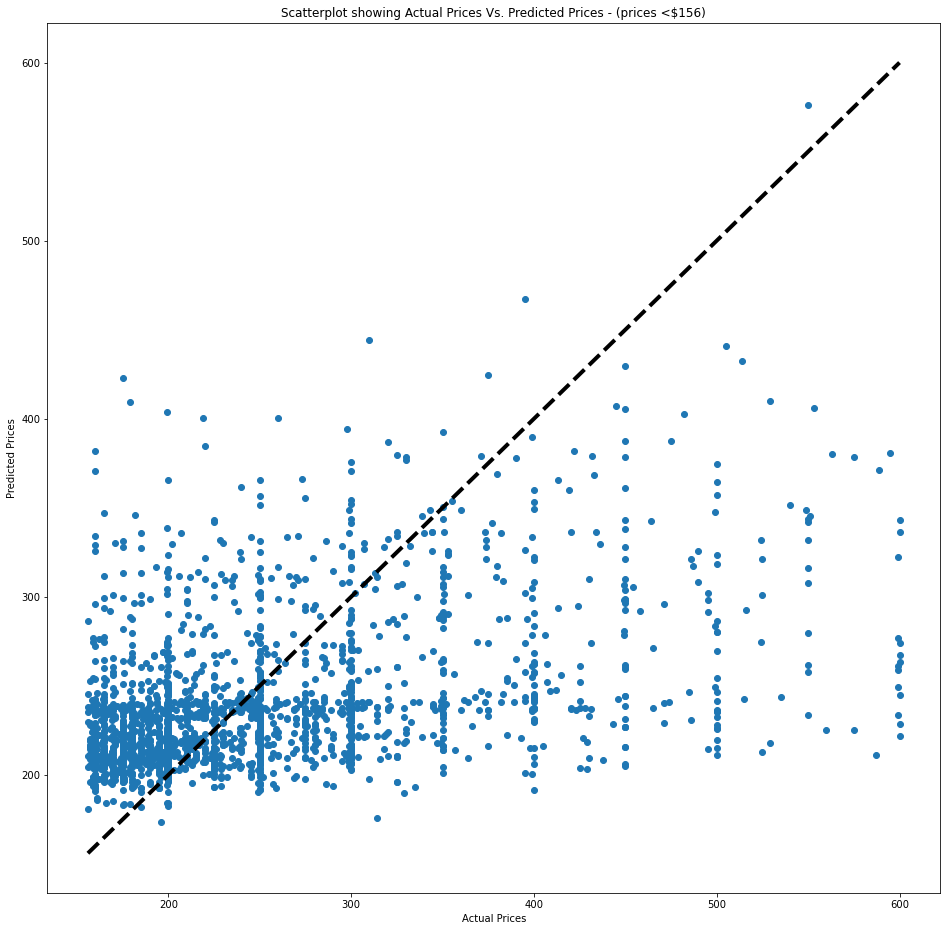

In [67]:
# scatterplot showing actual and predictions
scatterplot_predict_actual(y_te_156to600, y_te_156to600_pred)

In [104]:
cv.best_estimator_.feature_importances_

array([0.00933378, 0.11515423, 0.06342343, 0.38904756, 0.02873584,
       0.1024752 , 0.08628985, 0.04860197, 0.00846313, 0.00530027,
       0.00982221, 0.09008616, 0.0100313 , 0.00937672, 0.02082822,
       0.00303012])

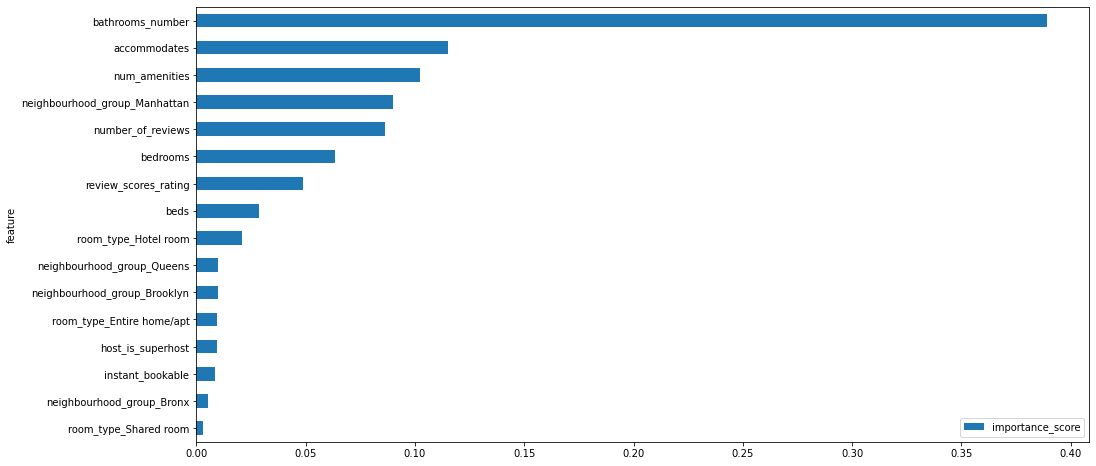

In [105]:
feat_imps = feature_importances_barchart(X_te_156to600.columns, cv.best_estimator_.feature_importances_)

Here the feature importances barchart shows that for price range $156 - $600 features like bathrooms number, accommodates, number of amenities and neighborhood-manhatton are more important than any other features in determining which leaf node a sample should belong to.

**Error Analysis (for prices $ 156 - 600)**



In [68]:
# making predicted values into a pandas series
y_te_156to600_pred = pd.Series(np.exp(y_te_156to600_pred), index=y_te_156to600.index)

In [69]:
# combining predicted and actual values into a dataframe
df_156to600 = pd.DataFrame(data=[np.exp(y_te_156to600), y_te_156to600_pred]).T
df_156to600.columns = ['y_te_156to600', 'y_te_156to600_pred']
df_156to600.head()



,y_te_156to600,y_te_156to600_pred
10479,180.0,212.550677
12841,250.0,242.842296
24003,250.0,237.080205
18171,161.0,187.047512
18732,250.0,228.210948


In [70]:
#combining the predicted, actual values with the features columns (X_test)
X_te_156to600_y_te_156to600 = pd.concat([df_156to600, X_te_156to600], axis=1)

In [71]:
# calculating mae
X_te_156to600_y_te_156to600['error'] = X_te_156to600_y_te_156to600['y_te_156to600'] - X_te_156to600_y_te_156to600['y_te_156to600_pred']

In [72]:
# Finding number of predictions that has mae less than $50
X_te_156to600_y_te_156to600.loc[np.abs(X_te_156to600_y_te_156to600['error']) < 50]

,y_te_156to600,y_te_156to600_pred,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,review_scores_rating,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,error
10479,180.0,212.550677,0,2,1.0,1.0,1.0,9,2,100.0,0,0,0,1,0,1,0,0,-32.550677
12841,250.0,242.842296,0,3,2.0,2.0,2.0,17,0,-10000.0,1,0,1,0,0,1,0,0,7.157704
24003,250.0,237.080205,1,7,3.0,1.5,3.0,27,1,100.0,0,0,1,0,0,1,0,0,12.919795
18171,161.0,187.047512,0,4,2.0,1.0,2.0,26,92,92.0,0,0,1,0,0,1,0,0,-26.047512
18732,250.0,228.210948,0,4,1.0,1.0,1.0,22,2,80.0,1,0,0,1,0,1,0,0,21.789052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23176,301.0,270.147996,0,2,1.0,1.0,1.0,19,1,60.0,1,0,0,1,0,0,1,0,30.852004
11169,225.0,255.143868,0,4,2.0,2.0,2.0,23,29,98.0,1,0,1,0,0,0,0,0,-30.143868
21413,180.0,213.536906,0,2,1.0,1.0,2.0,13,4,85.0,0,0,0,1,0,1,0,0,-33.536906
19986,250.0,227.207724,0,4,1.0,1.0,2.0,15,2,100.0,0,0,0,1,0,1,0,0,22.792276


In [73]:
print('Out of ' + str(round(8741/4)) + ' predictions, ' + str(round(1341/2185 *100)) + ' % has absolute error less than $50.')


Out of 2185 predictions, 61 % has absolute error less than $50.


In [112]:
1341/2185

0.6137299771167049

In [78]:
# Finding what type of features may have led for a high mae in prediction
X_te_156to600_y_te_156to600.loc[np.abs(X_te_156to600_y_te_156to600['error']) < 10]

,y_te_156to600,y_te_156to600_pred,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,review_scores_rating,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,error
12841,250.0,242.842296,0,3,2.0,2.0,2.0,17,0,-10000.0,1,0,1,0,0,1,0,0,7.157704
18161,355.0,353.545646,1,8,3.0,2.0,4.0,58,42,98.0,1,0,0,0,1,1,0,0,1.454354
28009,250.0,255.962358,1,6,2.0,2.0,2.0,28,2,100.0,0,0,1,0,0,1,0,0,-5.962358
1107,225.0,215.737077,0,3,1.0,1.0,1.0,9,3,70.0,0,0,0,1,0,1,0,0,9.262923
10578,199.0,208.104687,0,4,2.0,1.0,2.0,34,19,98.0,0,0,1,0,0,0,0,0,-9.104687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26817,250.0,257.973291,0,8,3.0,2.0,5.0,20,4,85.0,0,1,0,0,0,1,0,0,-7.973291
12296,220.0,213.927102,0,2,0.0,1.0,1.0,16,1,100.0,0,0,0,1,0,1,0,0,6.072898
8304,195.0,192.669523,0,2,0.0,1.0,1.0,22,44,97.0,0,0,1,0,0,1,0,0,2.330477
11808,199.0,201.123110,0,4,2.0,1.0,2.0,20,14,91.0,0,0,1,0,0,1,0,0,-2.123110


In [79]:
#Getting the test_data index from original index (e.g. for 27440)
X_te_156to600_y_te_156to600.index.get_loc(23830)

2178

In [76]:
explainer = shap.Explainer(cv.best_estimator_)
shap_values = explainer(X_te_156to600)

In [80]:
i = 2178
shap.force_plot(explainer.expected_value, shap_values.values[i], features=X_te_156to600.iloc[i], feature_names=X_te_156to600.columns)


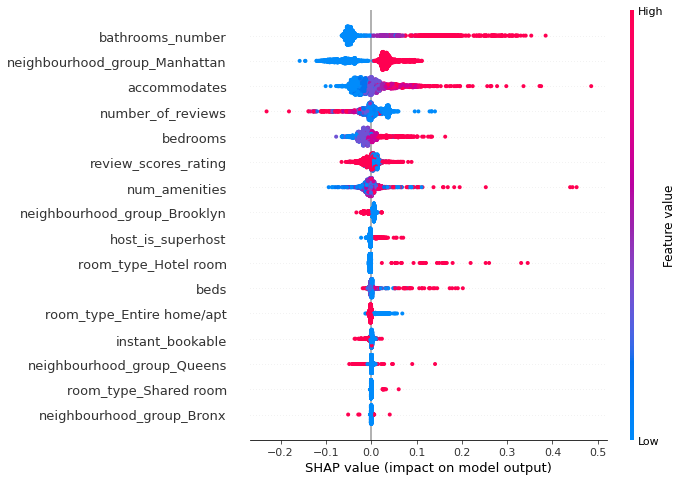

In [81]:
shap.summary_plot(shap_values, features=X_te_156to600, feature_names=X_te_156to600.columns)

In [122]:
# % of prices higher than $300 - 503 of 2185
# % of prices higher than $400 - 197 of 2185
(X_te_156to600_y_te_156to600['y_te_156to600'] > 400).sum()

197

In [123]:
X_te_156to600_y_te_156to600.loc[X_te_156to600_y_te_156to600['y_te_156to600_pred'] > 500]

,y_te_156to600,y_te_156to600_pred,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,review_scores_rating,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,error
34368,550.0,557.866282,0,16,0.0,0.5,0.0,3,0,-10000.0,0,0,1,0,0,0,0,0,-7.866282
